# Data Tech Challenge notebook is divided into the following parts.

## Table of Contents:

    1. Definition of Hypothesis
    2. Datasets
    3. Study Area selection
    4. Data Preparation and initial Visualization of the data
    5. Data Analysis for Hypothesis 1
    6. Data Analysis for Hypothesis 2
    7. Conclusion
        
        

# 1. Definition of Hypothesis:

Forest fires, a catastrophe, causes severe effects for the environment due to extensive Carbon Emissions which in turn leads to global warming (rise in temperature over a period of time on earth surface).

Research shows that the natural forest fires are more probable when there is increase in temperature, decrease in precipitation (rainfall) and decrease in humidity [1]

Hence, taking this into consideration, I would like to form my hypothesis 1. 

#### HYPOTHESIS 1: Forests which have experienced forest fires in the past should have undergone increase in temperature, decrease in precipitation and decrease in humidity before the catastrophe. 

As forests store huge amounts of carbon, they serve as climate protectors for us. However, a forest fire will result in huge amount of carbon emission which is one of the most important global concern [2]

#### HYPOTHESIS 2: Change in the Aerosol Optical Depth during and/or post forest fires due to very high carbon emissions.

[1]https://public.wmo.int/en/media/news/climate-change-increases-risk-of-wildfires

[2]https://www.un.org/development/desa/dpad/wp-content/uploads/sites/45/publication/PB_111.pdf

I will try to check whether these hypothesis are true or not with the help of historical data from Climate Data Store and Adtmosphere Data Store by European Comission implement by ECMWF.

# 2. Datasets used:

    * Burned Area data from ECMWF CDS database to know about forest fires
    * Meteorological data from ECMWF CDS database like temperature, pressure and humidity data
    * Aerosol optical depth from ECMWF ADS database like black carbon aerosol optical depth, dust carbon aerosol optical
    depth and total aerosol optical depth
    * Shapefiles of Andhra Pradesh state boundary and Nalla Malla forest area to subset the global dataset to Area of Interest

# 3. Study area selection:

#### SInce I need to confine our Area of Interest to a particular region, I am chosing Andhra Pradesh, a state in INDIA. 

Area of Andhra Pradesh: 274834.93 km2
Area of a thick forest (combination of Nallamalla and Lankamall forests) : 37723.32 km2

The shapefile of the Andhra Pradesh administrative boundary (state boundary) is downloaded from internet[3] and the global dataset of satellite fire burned area with all variables has been cropped to extent of Andhra Pradesh state. The forest shapefile is screen digitized using GIS software. Below you can find the pictures Area of Interest.

There is an important reason to chose Andhra Pradesh as area of interest due to its previous history of extensive wildfires in the years 2009 to 2011. Andhra Pradesh is in the top 2 states which are highly proned to forest fires in India.[4] 

Hence, I can analyse both our hypothesis by considering this study area. 

For this reason, the above datasets are downloaded for the years 2008,2009,2010,2011,2012 for months Jan, Feb, March, April, May and June. I have considered one year before and after the forest fires to check effectively the hypothesis and forest fires mostly happen from March till May in Andhra Pradesh.[4]

Andhra Pradesh boundary shapefile: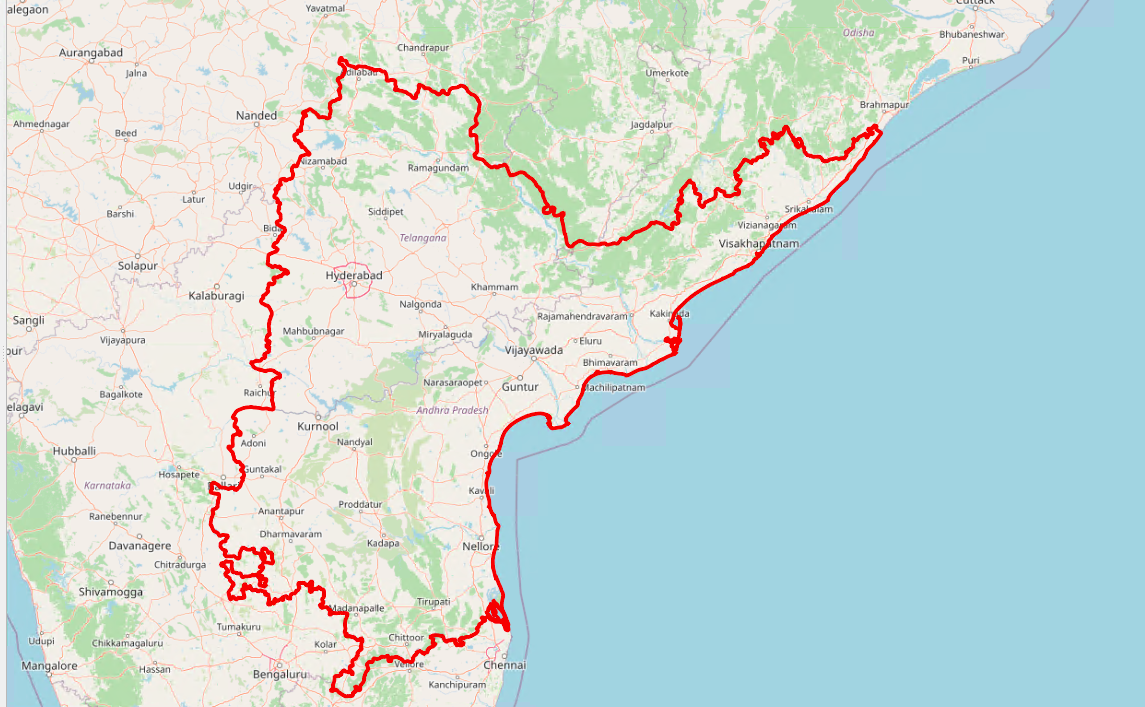

[3] https://www.diva-gis.org/datadown

[4] http://apenvis.nic.in/All%20PDF%20Files/COMMON/Status%20of%20Forest%20Fires%20of%20Andhra%20Pradesh.pdf

Nallamalla and Lankamalla forest shapefile: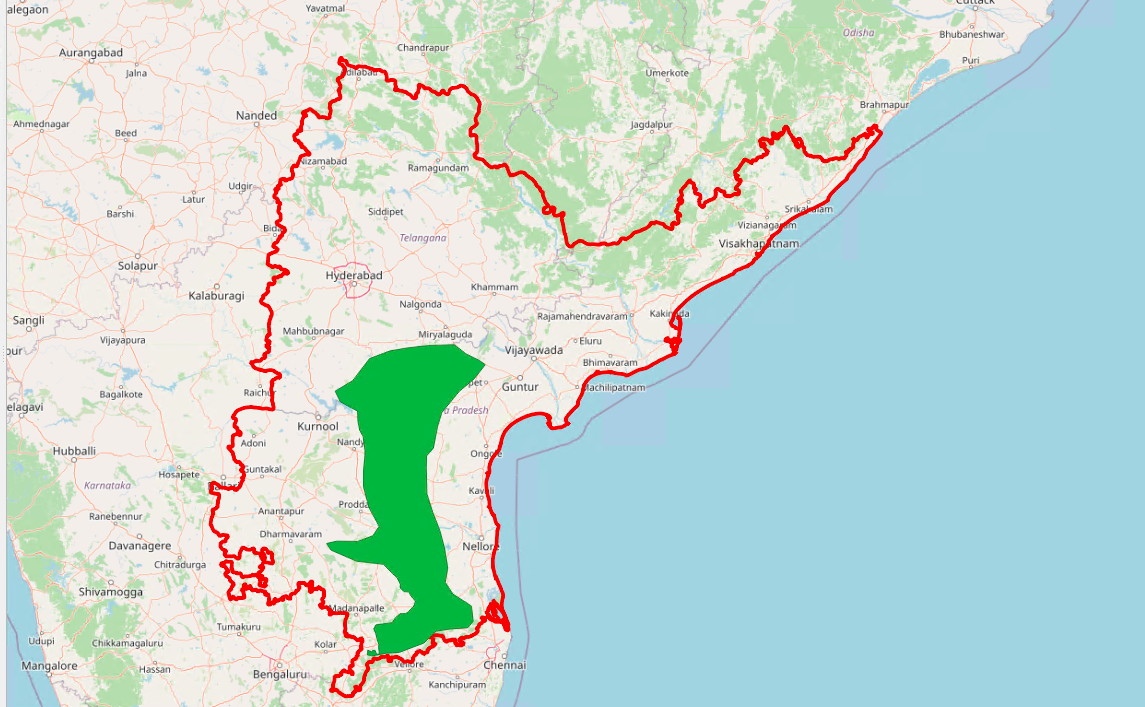

# 4. Data Preparation and Initial Visualization of the data

## Importing all the necessary packages

In [2]:
import numpy as np
import xarray as xr
import netCDF4
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import glob
import scipy

## 4.1 Burnt Area Data Preparation

#### The downloaded files of Burned Area for all the years are not in a single nc file. They are downloaded as separate nc file for every month of the respective year. 

Hence, I have to combine the data into a single netcdf file or I can directly chose to open the all the netcdf files into one. 

In [6]:
%%time

#  Opening all the nc files as a single dataset.
# the open_mfdataset combines are data automatically by checking the metadata of all the files.

# here we have used the coordinates of time dimension of Meteorological datset as the coordinates of burned
# area dataset is reading incorrectly even though right files and correct file names are located in the respective directory.
# Since both of the datasets has same time dimension, I have used it. Please run the meteorological data cells first and come back here.

ba_merge = xr.open_mfdataset('Data_output/BA/Burned_Area_Grid/Burned_Area_Pixel_2008_2012/*.nc')
time_array = md_merge['time']
ba_merge = ba_merge.assign_coords({'time':time_array})
# ba_merge.to_netcdf('Data_output/Merged_Datasets/Burnt_Area_2008_2012.nc')



CPU times: user 559 ms, sys: 8.63 ms, total: 568 ms
Wall time: 572 ms


In [7]:
# DATASET overview

# ba_merge

#### As our study area is Andhra Pradesh, I will subset the entire global dataset first to Andhra pradesh and perform visualization and analysis with that dataset. Later, I will change the subset bounds to the only forest area and run the cells again.

#### The reason of chosing only forest area subset is obvious. When aggregating data yearly, the contribution of pixels other than the forest area in the calculation might effect in proving the hypothesis.

In [14]:

# bounds of Andhra Pradesh. The extent is given by caling total_bounds function of geopandas. This extent is used to slice
# main dataset

#  Full Andhra Pradesh Extent

def extent_vector(vector_layer):
    aoi_lat = [float(vector_layer.total_bounds[1]), float(vector_layer.total_bounds[3])]
    aoi_lon = [float(vector_layer.total_bounds[0]), float(vector_layer.total_bounds[2])]
    
    
    return aoi_lat,aoi_lon

vector_data = gpd.read_file('Data_output/apshapefile/Andhra Pradesh.shp')
vector_data=vector_data.to_crs(epsg= 4326)
aoi_lat,aoi_lon=extent_vector(vector_data)

# ignore below two lines
# aoi_lat = [float(12.611840248), float(19.916088104)]
# aoi_lon = [float(76.756988525), float(84.761016846)]

# uncomment the below when you want to see the results for forest only area
# Extent of Nalla Malla forest in Andhra Pradesh

# vector_data = gpd.read_file('Data_output/forestshp/Forest_area_only_AP.shp')
# vector_data=vector_data.to_crs(epsg= 4326)
# aoi_lat,aoi_lon=extent_vector(vector_data)


# ignore below two lines
# aoi_lat = [float(13.081632269792184), float(16.666194551188916)]
# aoi_lon = [float(78.1464853977142), float(80.03619565150578)]



#### Slicing the dataset with the calculated bounds: Andhra Pradesh/ Forest Area


In [15]:

ba_merge_ap = ba_merge.sel(
    lat=slice(aoi_lat[1], aoi_lat[0]),
    lon=slice(aoi_lon[0], aoi_lon[1]),
    )


ba_merge_ap

<xarray.Dataset>
Dimensions:                          (bounds: 2, lat: 30, lon: 32, time: 30, vegetation_class: 18)
Coordinates:
  * lat                              (lat) float64 19.88 19.62 ... 12.88 12.62
  * lon                              (lon) float64 76.88 77.12 ... 84.38 84.62
  * time                             (time) datetime64[ns] 2008-01-01T08:00:0...
  * vegetation_class                 (vegetation_class) int32 -2147483647 ......
Dimensions without coordinates: bounds
Data variables:
    burned_area                      (time, lat, lon) float32 dask.array<chunksize=(1, 30, 32), meta=np.ndarray>
    standard_error                   (time, lat, lon) float32 dask.array<chunksize=(1, 30, 32), meta=np.ndarray>
    fraction_of_burnable_area        (time, lat, lon) float32 dask.array<chunksize=(1, 30, 32), meta=np.ndarray>
    fraction_of_observed_area        (time, lat, lon) float32 dask.array<chunksize=(1, 30, 32), meta=np.ndarray>
    number_of_patches                (time, lat, lon) float32 dask.array<chunksize=(1, 30, 32), meta=np.ndarray>
    burned_area_in_vegetation_class  (time, vegetation_class, lat, lon) float32 dask.array<chunksize=(1, 18, 30, 32), meta=np.ndarray>
    lat_bounds                       (time, lat, bounds) float64 dask.array<chunksize=(1, 30, 2), meta=np.ndarray>
    lon_bounds                       (time, lon, bounds) float64 dask.array<chunksize=(1, 32, 2), meta=np.ndarray>
    time_bounds                      (time, bounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    vegetation_class_name            (time, vegetation_class) |S150 dask.array<chunksize=(1, 18), meta=np.ndarray>
Attributes: (12/37)
    title:                      Fire_cci Gridded MODIS Burned Area product
    institution:                University of Alcala
    source:                     MODIS MOD09GQ Collection 6, MODIS MOD09GA Col...
    history:                    Created on 2017-12-19 06:42:41; modified with...
    references:                 See www.esa-fire-cci.org
    tracking_id:                93106f5b-50d8-4714-80e3-312d4e494409
    ...                         ...
    spatial_resolution:         0.25 degrees
    geospatial_lon_units:       degrees_east
    geospatial_lat_units:       degrees_north
    geospatial_lon_resolution:  0.25
    geospatial_lat_resolution:  0.25
    id:                         20080101-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc

#### Plotting all burned area data of Andhra Pradesh grouped by year (6 months in every year  from Jan to June)

Text(0.5, 1, '6 months Burned Area in Andhra Pradesh from 2008-2012')

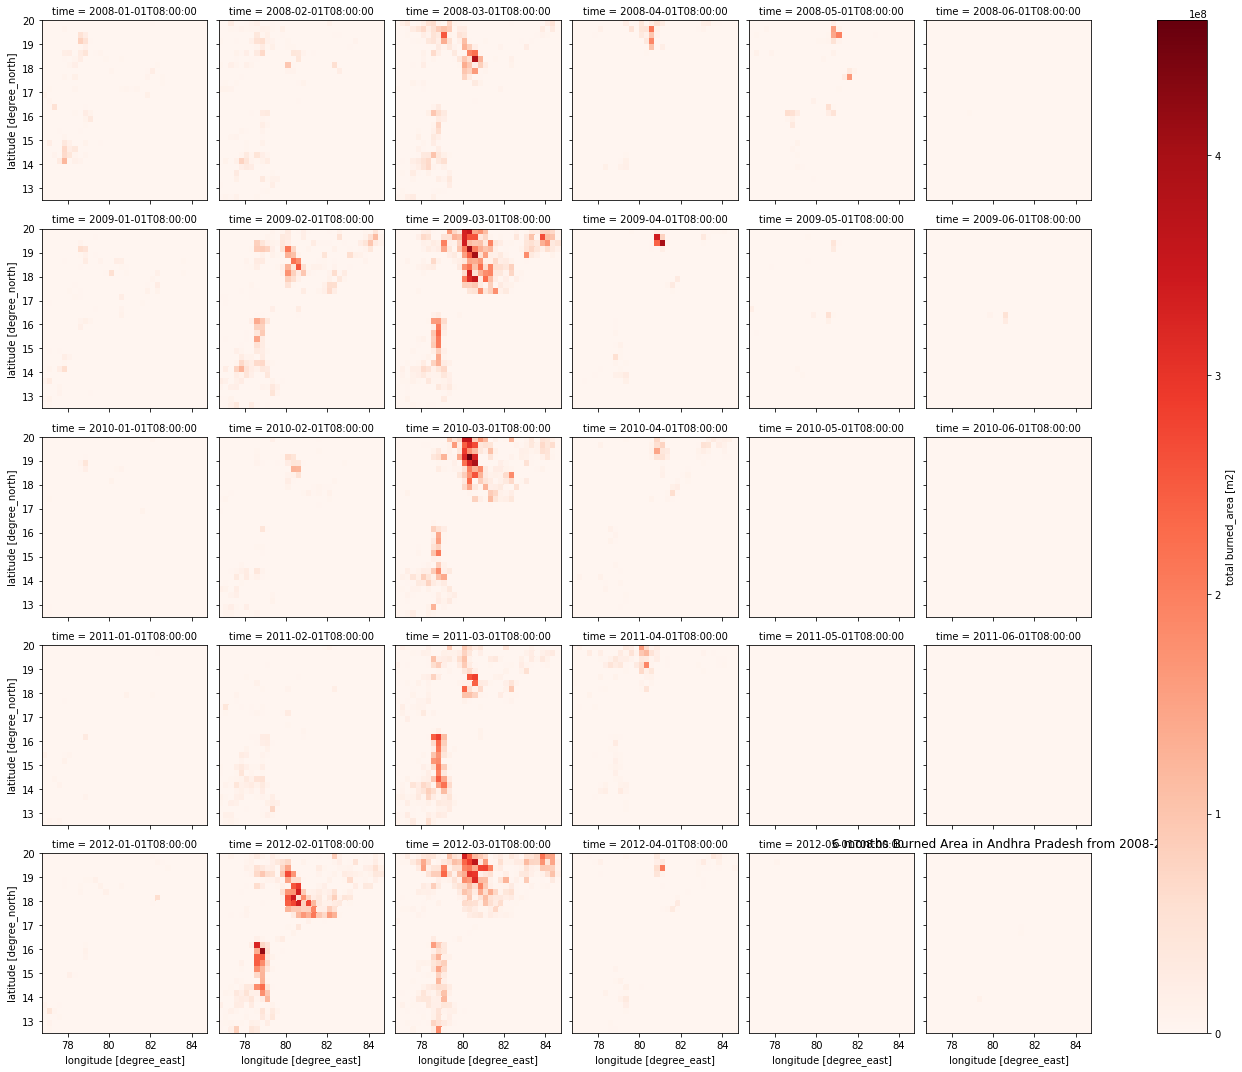

In [16]:
burnt_area_ap = ba_merge_ap['burned_area']

burnt_area_ap.plot(col='time',cmap=plt.cm.Reds, col_wrap=6)
plt.title('6 months Burned Area in Andhra Pradesh from 2008-2012')

# Additional Plots:

# 1 Dimensional Plot using a point location that has forest fires

# burnt_area_ap_1d = burnt_area_ap.sel(lat = 18.50,lon=80.15, method = 'nearest')
# burnt_area_ap_1d.plot()

# 2 Dimensional Plot using one time period

# burnt_area_ap_2d = burnt_area_ap.sel(time = '2012-03-01', method = 'nearest')
# burnt_area_ap_2d.plot()


### Intrepretation from the plots: 
The above plots (grouped year wise) shows the monthly burned area. Dark Red pixels incase the area of burned area is more and and very light red color no burn. The units of the burned area scale are in sq.meters. 1e8 says that the number should be multiplied with 10^8 to get the area in sq.meters

Here you can see that the most of the forest fires have happened in the month of March for the given years of data. However, I can also see that there also was a big fire in the state on Feb 2012.



## 4.2 Meteorological Data Preparation

#### The meteorological data from the climate datastore is downloaded in a single nc file for the given input parameters.

Hence no merging of NC files is necessary. However, I are just making sure that this nc file is in the same merged datasets folders for better data management for the next tasks.

In [17]:
md_merge = xr.open_dataset('Data_output/Merged_Datasets/Met_data_2008_2012.nc')

In [18]:
#overview of the dataset.The dataset contains temperature,precipitation and humidity as variables
# with time,lat and lon as dimensions.

md_merge

<xarray.Dataset>
Dimensions:    (latitude: 53, longitude: 61, time: 30)
Coordinates:
  * longitude  (longitude) float32 75.0 75.25 75.5 75.75 ... 89.5 89.75 90.0
  * latitude   (latitude) float32 23.0 22.75 22.5 22.25 ... 10.5 10.25 10.0
  * time       (time) datetime64[ns] 2008-01-01T08:00:00 ... 2012-06-01T08:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-09 23:14:35 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

### Slicing the global dataset to our Area of Interest: Andhra Pradesh/Forest Area

In [19]:
# using the same lat and lon extent used above for burned area product.

md_merge_ap = md_merge.sel(
    latitude=slice(aoi_lat[1], aoi_lat[0]),
    longitude=slice(aoi_lon[0], aoi_lon[1]),
    )


md_merge_ap

<xarray.Dataset>
Dimensions:    (latitude: 29, longitude: 32, time: 30)
Coordinates:
  * longitude  (longitude) float32 77.0 77.25 77.5 77.75 ... 84.25 84.5 84.75
  * latitude   (latitude) float32 19.75 19.5 19.25 19.0 ... 13.25 13.0 12.75
  * time       (time) datetime64[ns] 2008-01-01T08:00:00 ... 2012-06-01T08:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 301.5 302.1 ... 302.2 302.1
    d2m        (time, latitude, longitude) float32 284.1 283.2 ... 298.8 298.8
    tp         (time, latitude, longitude) float32 1.082e-06 ... 7.034e-05
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-09 23:14:35 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

#### Plotting all meteorological data like temperature, precipitation and humidity of Andhra Pradesh grouped by year (6 months in every year  from Jan to June)


Text(0.5, 1, '6 months Temperature Plots in Andhra Pradesh from 2008-2012 ')

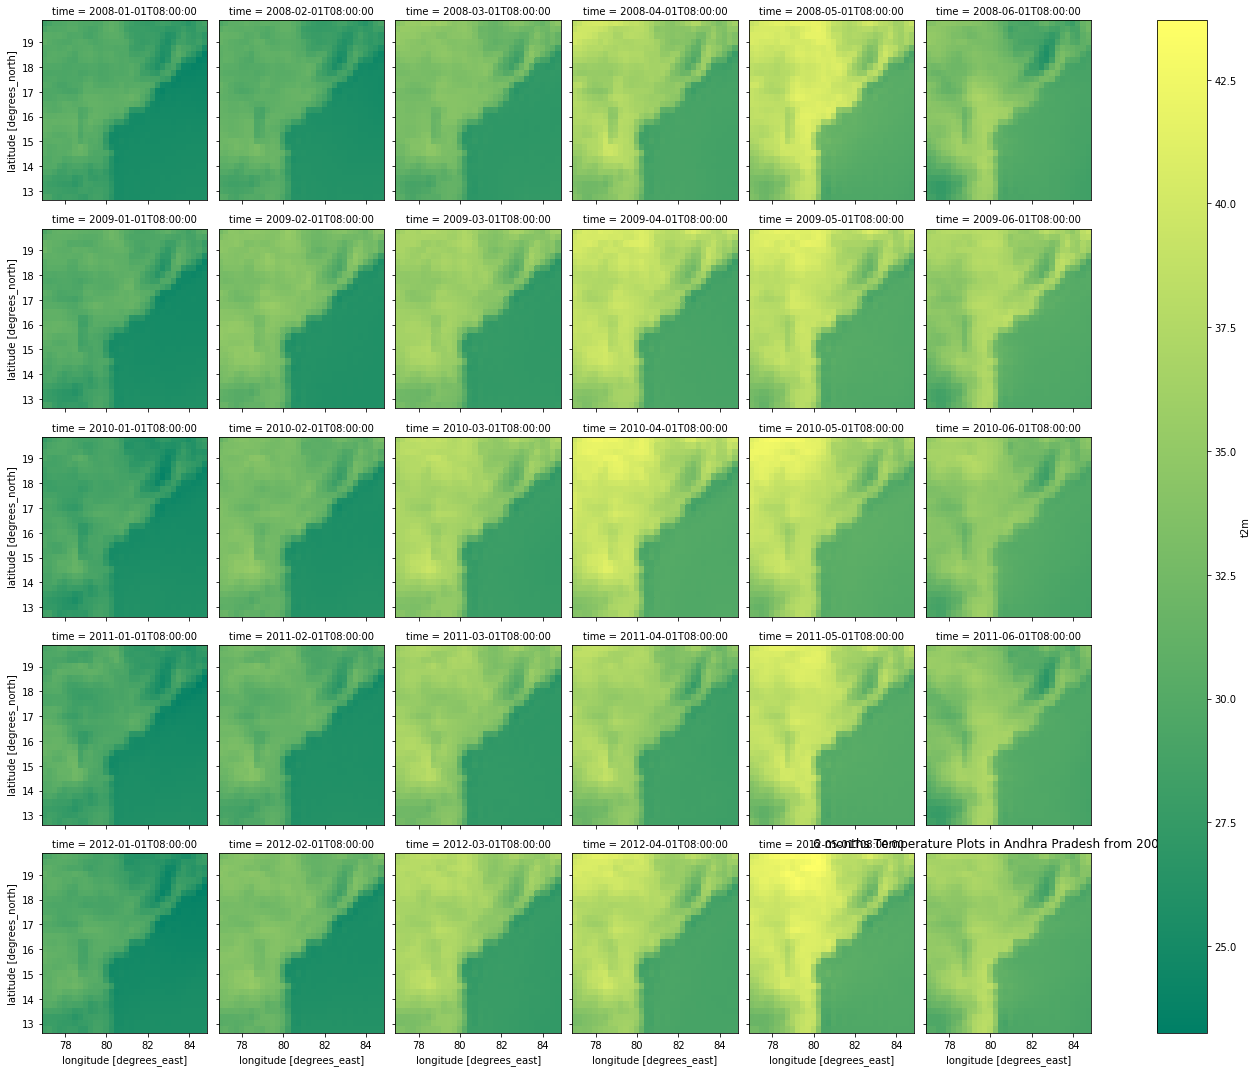

In [20]:
md_area_ap_t2m = md_merge_ap['t2m']
md_area_ap_t2m = md_area_ap_t2m - 273.15

md_area_ap_t2m.plot(col='time',cmap=plt.cm.summer, col_wrap=6)
plt.title("6 months Temperature Plots in Andhra Pradesh from 2008-2012 ")


# Additional Plots:

# 1 Dimensional Plot using a point location that has forest fires

# md_area_ap_1d = md_area_ap_t2m.sel(lat = 18.50,lon=80.15, method = 'nearest')
# md_area_ap_1d.plot()

# 2 Dimensional Plot using one time period

# md_area_ap_2d = md_area_ap_t2m.sel(time = '2012-03-01', method = 'nearest')
# md_area_ap_2d.plot()


### Intrepretation of the plots above: 

#### Temperature plots:

The temperature plots (grouped year wise) shows the air temperature (given in kelvin) value above 2 meters from the surface. Dark yellow pixels  corresponds ot high temperature and light green corresponds to less temperature.

There is constant increase from January to April and decrease in temperature from May to June canbe observed from the plots of all years considered 

Text(0.5, 1, '6 months Precipitation Plots in Andhra Pradesh from 2008-2012 ')

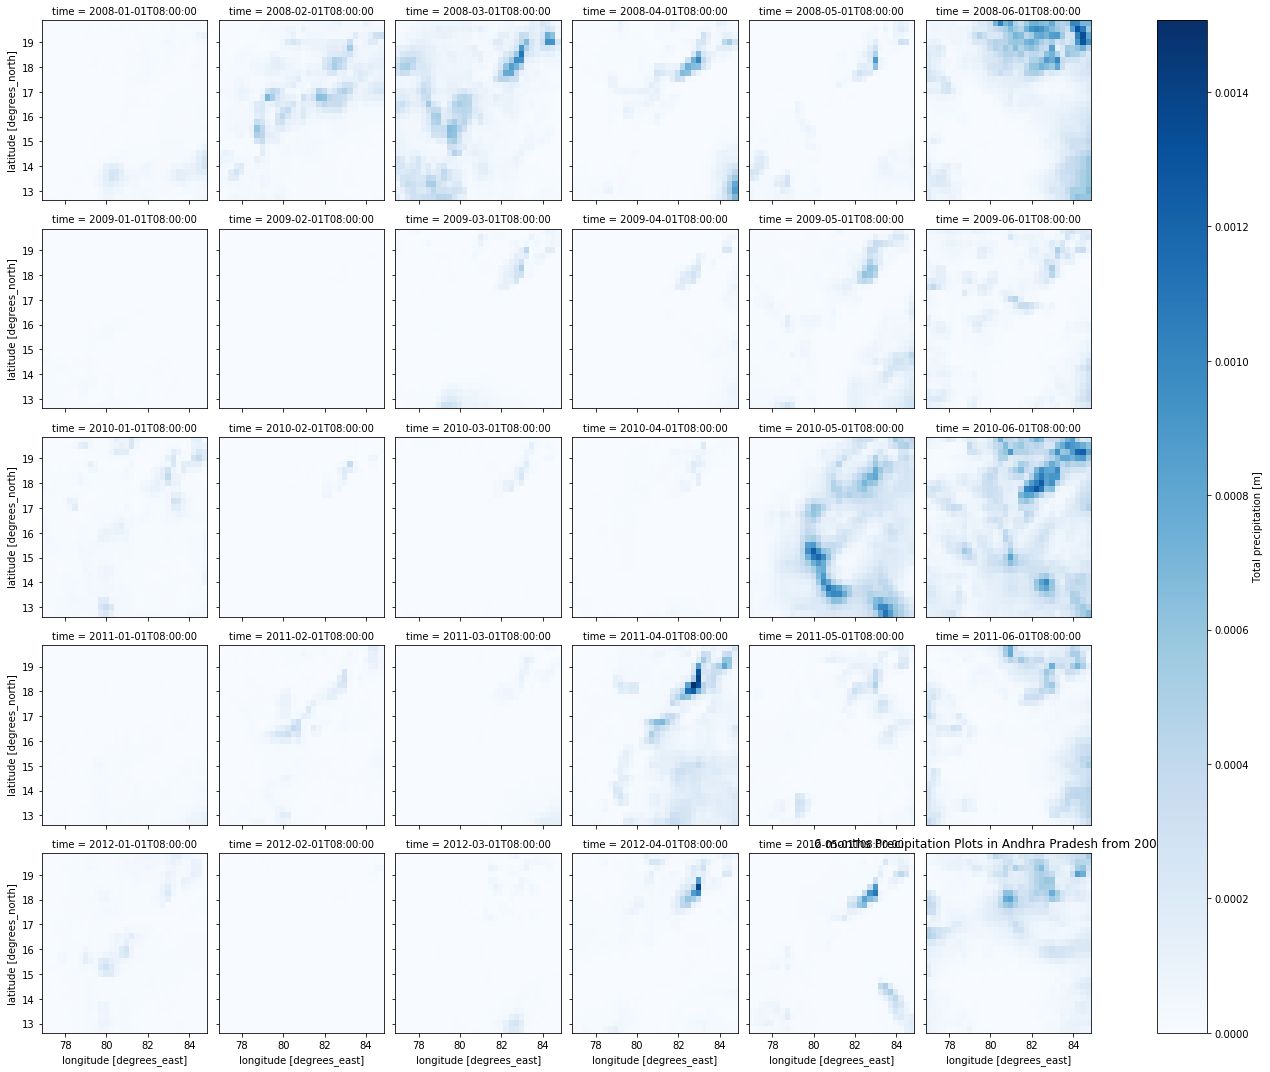

In [21]:
md_area_ap_tp = md_merge_ap['tp']

md_area_ap_tp.plot(col='time',cmap=plt.cm.Blues, col_wrap=6)
plt.title("6 months Precipitation Plots in Andhra Pradesh from 2008-2012 ")


# Additional Plots:

# 1 Dimensional Plot using a point location that has forest fires

# md_area_ap_1d = md_area_ap_tp.sel(lat = 18.50,lon=80.15, method = 'nearest')
# md_area_ap_1d.plot()

# 2 Dimensional Plot using one time period

# md_area_ap_2d = md_area_ap_tp.sel(time = '2012-03-01', method = 'nearest')
# md_area_ap_2d.plot()

### Intrepretation of the plots above: 
 

#### Precipitation plots:

The precipitation plots (grouped year wise) shows the precipitation (given in meters). Dark blue pixels  corresponds ot high precipitation and light blue corresponds to low precipitation.

The precipitation is very low in the centre parts of the selected region , but a some parts of the area have experienced high precipitation in the year 2008


Text(0.5, 1, '6 months Humidity Plots in Andhra Pradesh from 2008-2012 ')

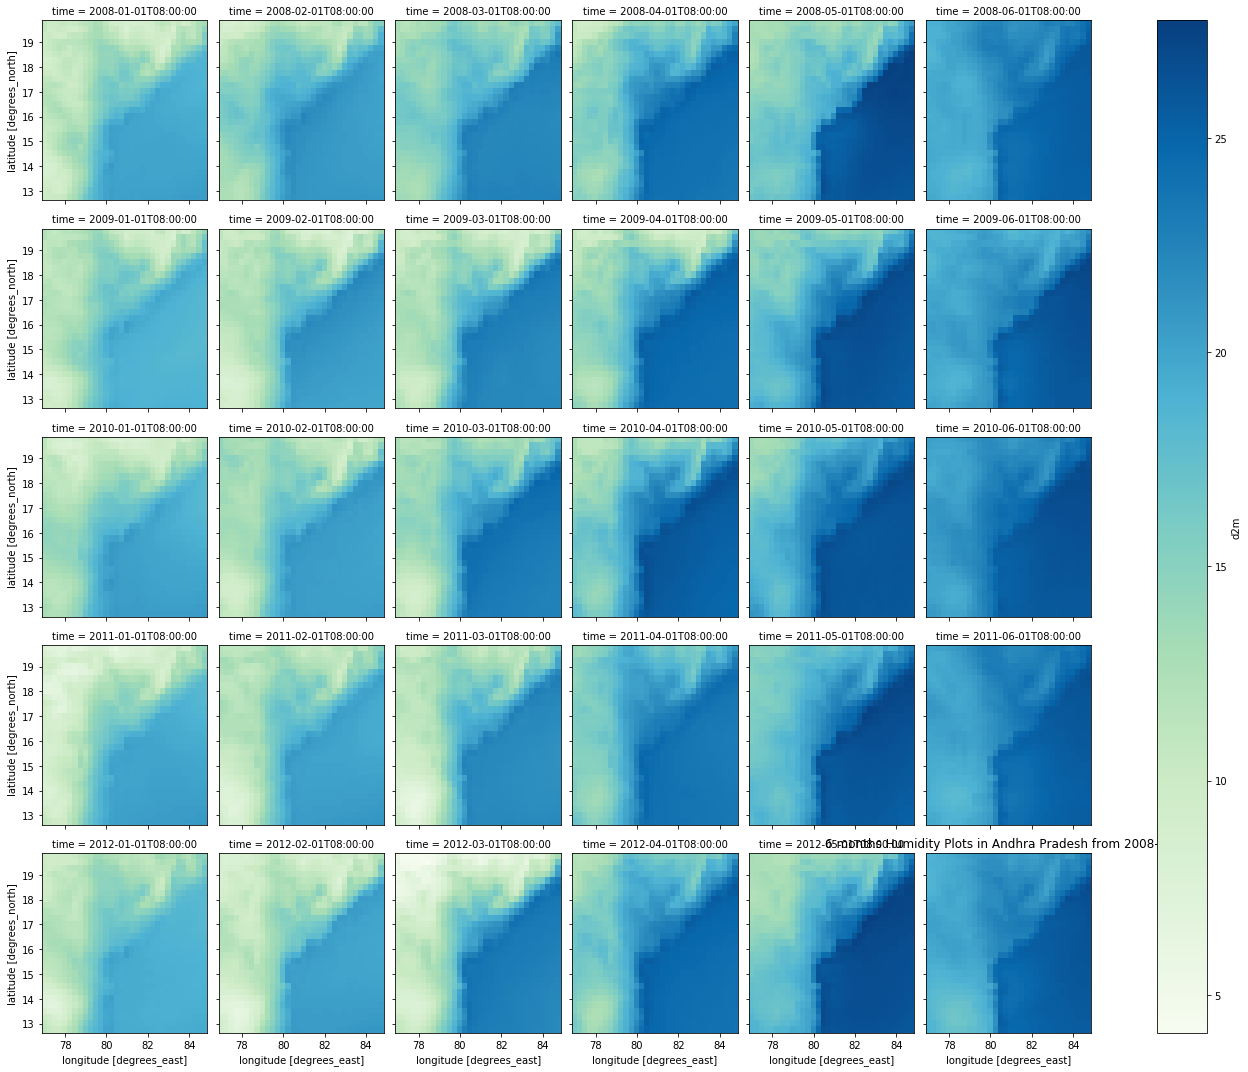

In [22]:
md_area_ap_d2m = md_merge_ap['d2m']
md_area_ap_d2m = md_area_ap_d2m - 273.15


md_area_ap_d2m.plot(col='time',cmap=plt.cm.GnBu, col_wrap=6)
plt.title("6 months Humidity Plots in Andhra Pradesh from 2008-2012 ")

# Additional Plots:

# 1 Dimensional Plot using a point location that has forest fires

# md_area_ap_1d = md_area_ap_d2m.sel(lat = 18.50,lon=80.15, method = 'nearest')
# md_area_ap_1d.plot()

# 2 Dimensional Plot using one time period

# md_area_ap_2d = md_area_ap_d2m.sel(time = '2012-03-01', method = 'nearest')
# md_area_ap_2d.plot()

### Intrepretation of the the plots above: 


#### Humidity plots:

The humidity plots (grouped year wise) shows the humidity data (given in degrees centigrade) above 2m from the surface of earth. Dark blue pixels  corresponds ot high humidity and light green corresponds to low humidity.

Humidity is constantly increasing with months for all the years.

## 4.3 Carbon emissions and aerosol optical depth Data Preparation

The data is downloaded as a single nc file for every month of the respective year.

Hence no merging of NC files is necessary. However, I am just making sure that this nc file is in the same merged datasets folders for better data management for the next tasks.



In [23]:
#  Opening all the nc files as a single dataset.
# the open_mfdataset combines are data automatically by checking the metadata of all the files.

ca_merge = xr.open_dataset('Data_output/PD/co2_2008_2012.nc')
# co2_merge.to_netcdf('Data_output/Merged_Datasets/CO2_Fossil_Fuel_Emission_2008_2012.nc')




In [24]:
# overview of the dataset. The dataset contains black carbon aerosol optical depth, dust aerosol optical depth and
# total aerosol optical depth as variables with time,lat and lon as dimensions.

ca_merge

<xarray.Dataset>
Dimensions:    (latitude: 18, longitude: 21, time: 30)
Coordinates:
  * longitude  (longitude) float32 75.0 75.75 76.5 77.25 ... 88.5 89.25 90.0
  * latitude   (latitude) float32 22.75 22.0 21.25 20.5 ... 11.5 10.75 10.0
  * time       (time) datetime64[ns] 2008-01-01 2008-02-01 ... 2012-06-01
Data variables:
    bcaod550   (time, latitude, longitude) float32 ...
    duaod550   (time, latitude, longitude) float32 ...
    aod550     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-09 21:49:36 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

#### Slicing the global dataset to our Area of Interest: Andhra Pradesh/Forest Area

In [25]:
# using the same lat and lon extent used above for burned area product.

ca_merge_ap = ca_merge.sel(
    latitude=slice(aoi_lat[1], aoi_lat[0]),
    longitude=slice(aoi_lon[0], aoi_lon[1]),
    )


ca_merge_ap

<xarray.Dataset>
Dimensions:    (latitude: 10, longitude: 11, time: 30)
Coordinates:
  * longitude  (longitude) float32 77.25 78.0 78.75 79.5 ... 83.25 84.0 84.75
  * latitude   (latitude) float32 19.75 19.0 18.25 17.5 ... 14.5 13.75 13.0
  * time       (time) datetime64[ns] 2008-01-01 2008-02-01 ... 2012-06-01
Data variables:
    bcaod550   (time, latitude, longitude) float32 0.01739 0.01691 ... 0.01226
    duaod550   (time, latitude, longitude) float32 0.005623 0.00522 ... 0.1195
    aod550     (time, latitude, longitude) float32 0.3852 0.3854 ... 0.5191
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-09 21:49:36 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

#### Plotting Carbon Emissions induced aerosol optical depth grouped by year (6 months in every year  from Jan to June)


Text(0.5, 1, '6 months Aerosol Optical Depth caused due to Carbon Emissions Plots in Andhra Pradesh from 2008-2012 ')

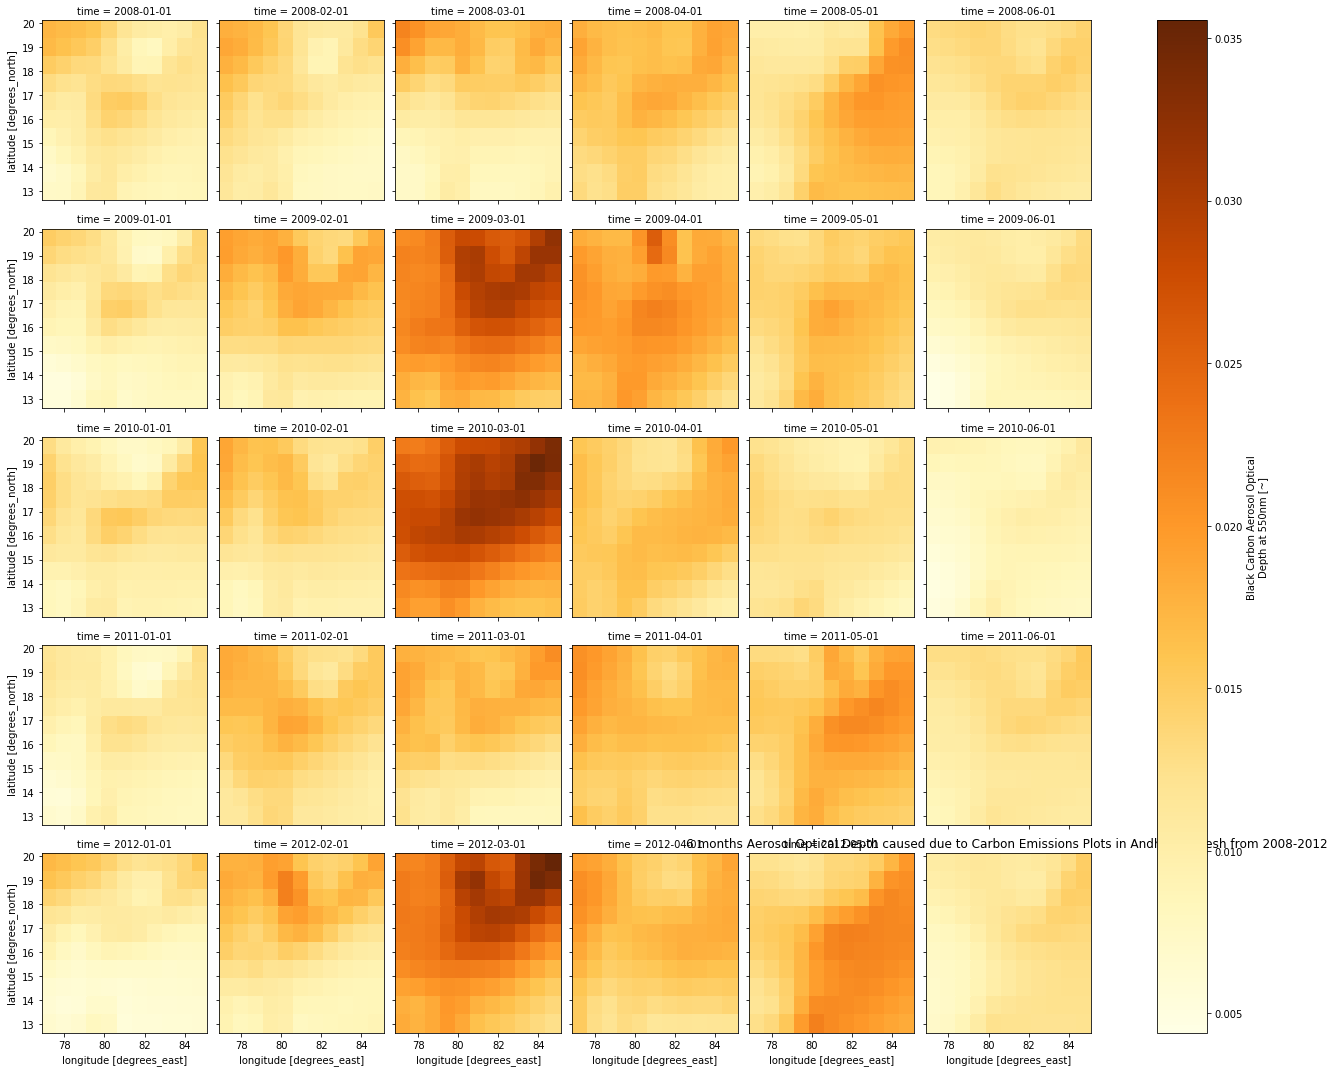

In [26]:

ca_area_ap_bcaod = ca_merge_ap['bcaod550']

ca_area_ap_bcaod.plot(col='time',cmap=plt.cm.YlOrBr, col_wrap=6)
plt.title("6 months Aerosol Optical Depth caused due to Carbon Emissions Plots in Andhra Pradesh from 2008-2012 ")


# Additional Plots:

# 1 Dimensional Plot using a point location that has forest fires

# ca_area_ap_1d = ca_area_ap_bcaod.sel(lat = 18.50,lon=80.15, method = 'nearest')
# ca_area_ap_1d.plot()

# 2 Dimensional Plot using one time period

# ca_area_ap_2d = ca_area_ap_bcaod.sel(time = '2012-03-01', method = 'nearest')
# ca_area_ap_2d.plot()


#### Interpretation of the above plot:

The dark orange areas show high carbon emissions and light organge pixels shows low carbon emissions. It is a dimensionless quantity.

I can see a lot of carbon emissions in the months of March and April for all years from the above plots and very less carbon emissions in the month of june for all years as well

#### Plotting total aerosol optical depth data  grouped by year (6 months in every year  from Jan to June)


Text(0.5, 1, '6 months Aerosol Optical Depth caused due to Carbon Emissions Plots in Andhra Pradesh from 2008-2012 ')

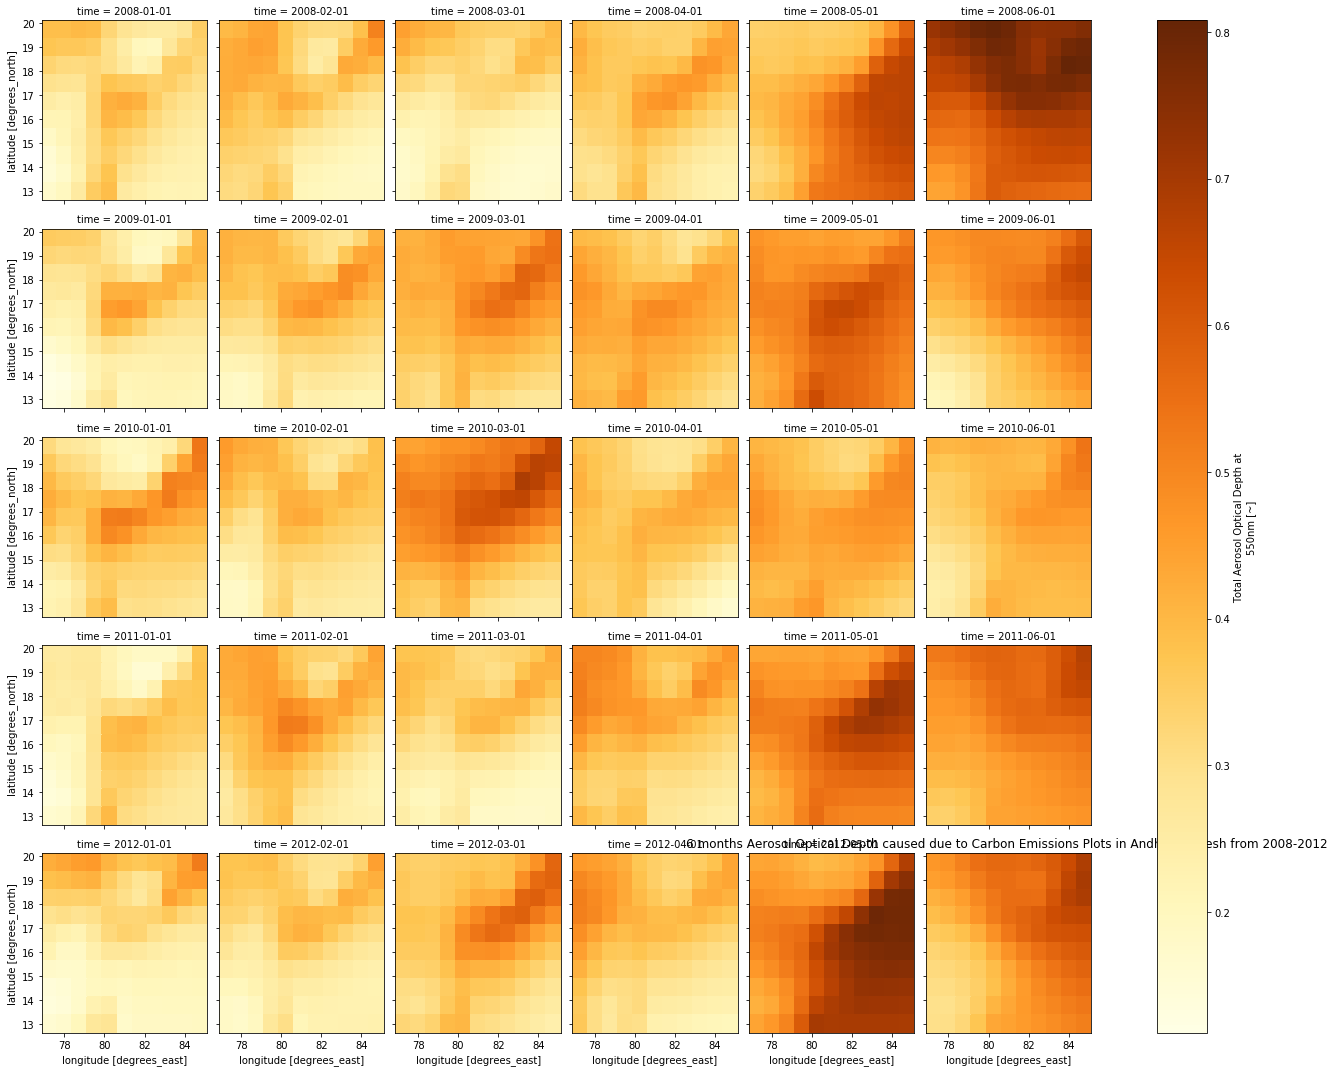

In [27]:

ca_area_ap_aod = ca_merge_ap['aod550']

ca_area_ap_aod.plot(col='time',cmap=plt.cm.YlOrBr, col_wrap=6)
plt.title("6 months Aerosol Optical Depth caused due to Carbon Emissions Plots in Andhra Pradesh from 2008-2012 ")


# Additional Plots:

# 1 Dimensional Plot using a point location that has forest fires

# ca_area_ap_1d = ca_area_ap_aod.sel(lat = 18.50,lon=80.15, method = 'nearest')
# ca_area_ap_1d.plot()

# 2 Dimensional Plot using one time period

# ca_area_ap_2d = ca_area_ap_aod.sel(time = '2012-03-01', method = 'nearest')
# ca_area_ap_2d.plot()


#### Interpretation of the above plot:

The dark orange areas show high dust emissions and light organge pixels shows low dust emissions. It is a dimensionless quantity.

This looks interesting as I can see that there is an increase in dust emissions with months for all years from above.

#### Plotting dust induced aerosol optical depth data grouped by year (6 months in every year  from Jan to June)


Text(0.5, 1, '6 months Aerosol Optical Depth caused due to Carbon Emissions Plots in Andhra Pradesh from 2008-2012 ')

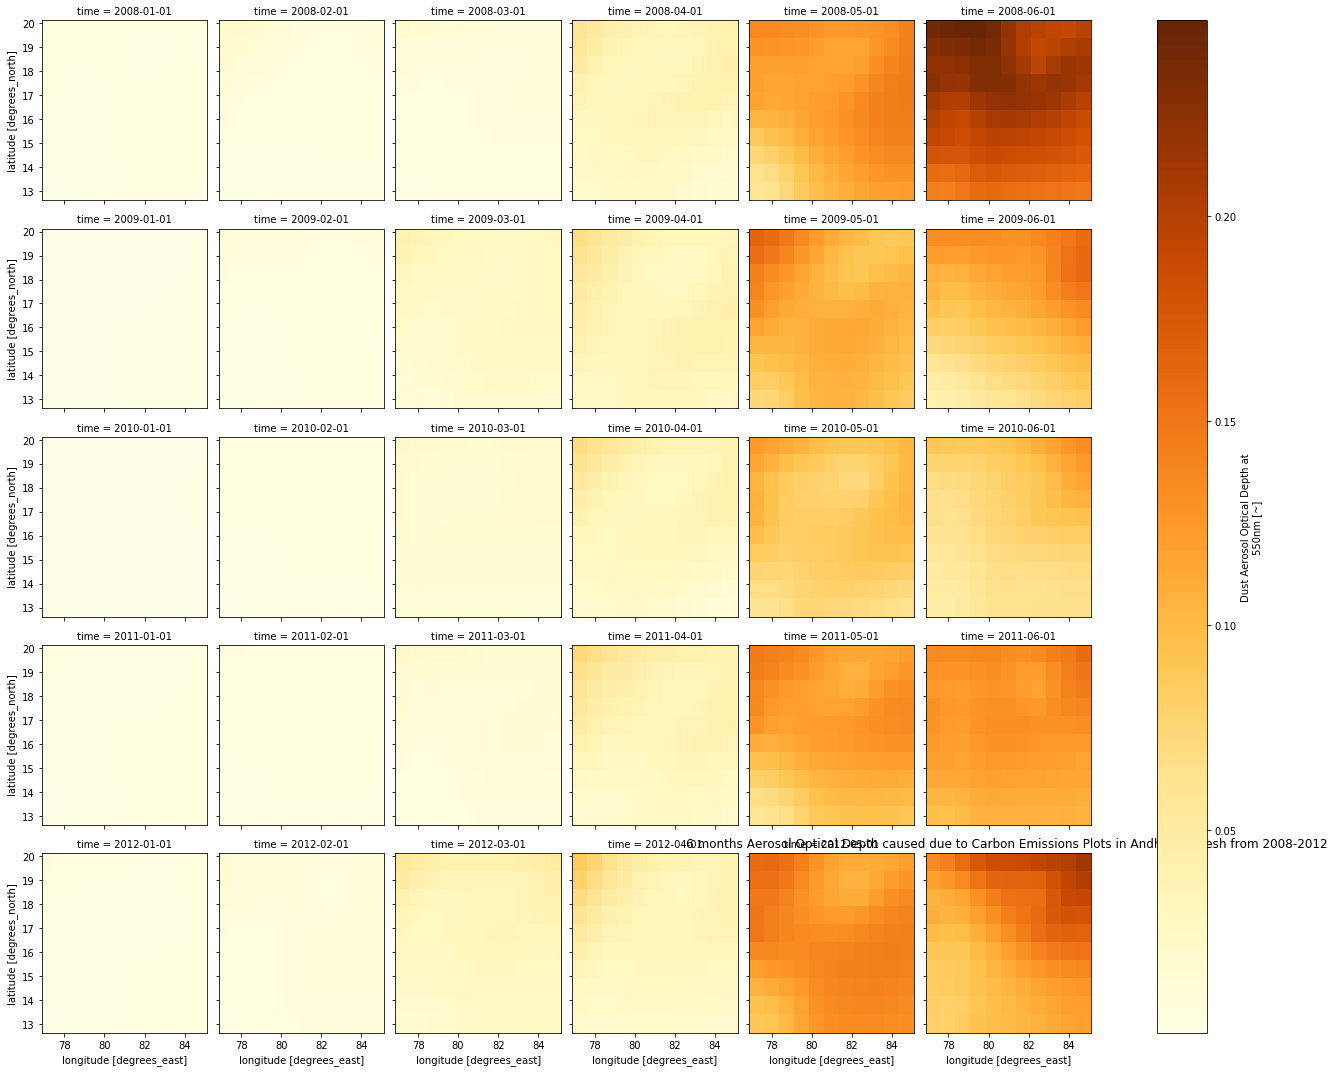

In [28]:

ca_area_ap_duaod = ca_merge_ap['duaod550']

ca_area_ap_duaod.plot(col='time',cmap=plt.cm.YlOrBr, col_wrap=6)
plt.title("6 months Aerosol Optical Depth caused due to Carbon Emissions Plots in Andhra Pradesh from 2008-2012 ")


# Additional Plots:

# 1 Dimensional Plot using a point location that has forest fires

# ca_area_ap_1d = ca_area_ap_duaod.sel(lat = 18.50,lon=80.15, method = 'nearest')
# ca_area_ap_1d.plot()

# 2 Dimensional Plot using one time period

# ca_area_ap_2d = ca_area_ap_duaod.sel(time = '2012-03-01', method = 'nearest')
# ca_area_ap_2d.plot()


#### Interpretation of the above plot:

The dark orange areas shows that Total AOD is high and light organge pixels shows low Total AOD. It is a dimensionless quantity.

The total AOD has increased significantly like Dust Emissions over the months for all the years.

# 5. Data Analysis:


I will divide the data analysis for the given hypothesis in two parts. Seeing the data trent over the given period of time 
for the complete state of Andhra Pradesh in both monthly and yearly wise. 

Later, I further shorten our study area to only forest region in Andhra Pradesh and calculates the trends of all variables and see if there is any correlation between the burned area and the respective variables considered for the hypothesis.

## Data Analysis: Hypothesis 1

##  Forests which have experienced forest fires in the past should have undergone increase in temperature, decrease in precipitation and decrease in humidity before the catastrophe.



#### The sixmonth_year() and year_wise() functions :

Thes functions takes two parameters as input. One is Dataarray and the other is identifier. 

The identifier is used separate the way we resample the data to perform aggregation analysis. Identifier == 1 says that the variable values should be summed up but not mean in the given dimension (time dimension in our case) any other value corresponds to mean.

In case of sixmonth_year(), the variable values are either summed up or mean is calculated for every dimension of time in the entire area of interest. 

However, in year_wise() function, the dataarray is first resampled into only years data by adding or taking mean in the given dimension. Later the variable dataarray is summed up or mean is calculated in the area of interest for all the resampled time dimensions.

In [29]:
def sixmonth_year(data_array,identifier):

            
    times = data_array['time']
    
#    created manually for the axis labels for plotting bar charts

    time_6m_axis = ['2008-01','2008-02','2008-03','2008-04','2008-05','2008-06',
                        '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06',
                       '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06',
                       '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06',
                       '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06']

    values = []
    if identifier == 1:
    

        for i in times:
#             dividing by 10^6 to chnage units from sq.mts to sq.kms
            x = data_array.sel(time = i).to_series().sum()/1000000
            values.append(x)
            
    else:
    

        for i in times:
            x = data_array.sel(time = i).to_series().mean()
            values.append(x)
        
        

    return time_6m_axis, values

In [30]:
def year_wise(data_array,identifier):
    
    values=[]
    global time_year

    if identifier==1:
        
        yearly_data = data_array.resample(time = '1Y').sum('time')
#     yearly_data.plot(col='time',cmap=plt.cm.YlOrBr, col_wrap=6)
        time_year = yearly_data['time']
        
        for i in time_year:
            x = yearly_data.sel(time = i).to_series().sum()/1000000
            values.append(x)
            
    else:
        
        yearly_data = data_array.resample(time = '1Y').mean('time')
#     yearly_data.plot(col='time',cmap=plt.cm.YlOrBr, col_wrap=6)
        time_year = yearly_data['time']
        
        for i in time_year:
            x = yearly_data.sel(time = i).to_series().mean()
            values.append(x)
            
# time_year.dt.year gives the year only data of the time dimension which serves as labels fo
    return time_year.dt.year, values

#### Plotting Burned Area Data

In [31]:
time_range_6m_yr, ba_value_6m_yr = sixmonth_year(burnt_area_ap,1)
time_range_yr,ba_value_yr = year_wise(burnt_area_ap,1)

<IPython.core.display.Javascript object>


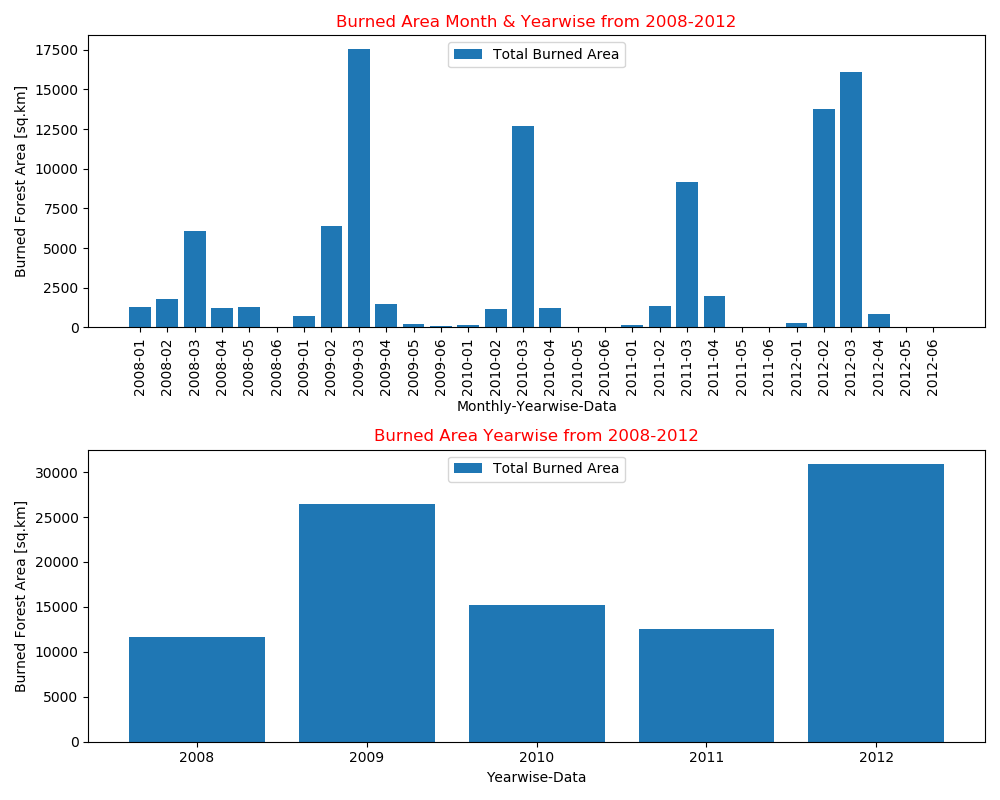

In [32]:
%matplotlib notebook

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].set_xticklabels(time_range_6m_yr, rotation=90)
axs[0].set_xlabel('Monthly-Yearwise-Data')
axs[0].set_ylabel('Burned Forest Area [sq.km]')
axs[0].set_title('Burned Area Month & Yearwise from 2008-2012',color = 'Red')
axs[0].bar(time_range_6m_yr,ba_value_6m_yr, label = 'Total Burned Area')
axs[0].legend(loc = 'upper center')




axs[1].set_xlabel('Yearwise-Data')
axs[1].set_ylabel('Burned Forest Area [sq.km]')
axs[1].set_title('Burned Area Yearwise from 2008-2012', color = 'Red')
axs[1].bar(time_range_yr,ba_value_yr, label = 'Total Burned Area')
axs[1].legend(loc = 'upper center')

plt.tight_layout()



plt.show()



#### Plotting Meteorological Data

In [33]:
time_range_6m_yr, md_value_t2m_6m_yr = sixmonth_year(md_area_ap_t2m,2)

time_range_6m_yr, md_value_tp_6m_yr= sixmonth_year(md_area_ap_tp,2)

time_range_6m_yr, md_value_d2m_6m_yr= sixmonth_year(md_area_ap_d2m,2)


<IPython.core.display.Javascript object>


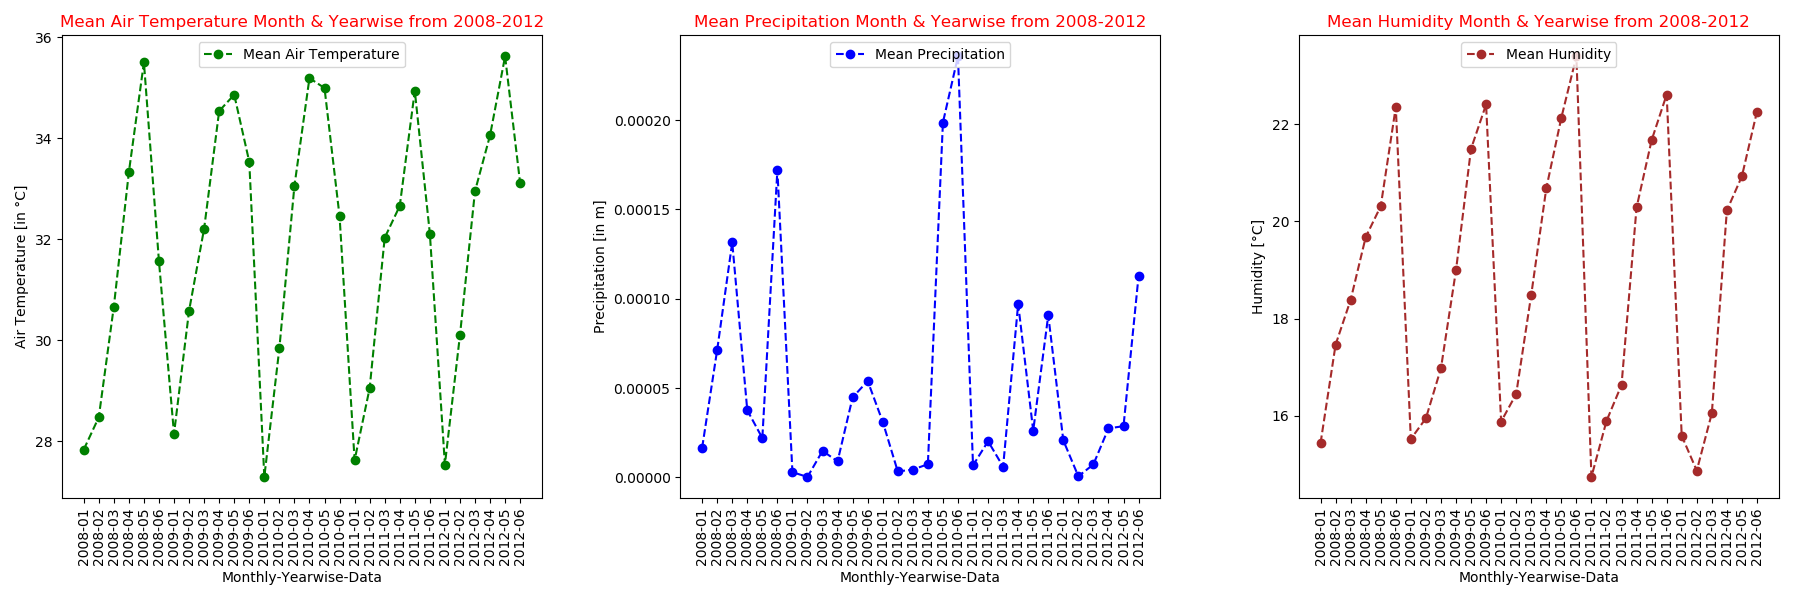

In [51]:

import warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(1, 3, figsize=(18,6))

axs[0].set_xticklabels(time_range_6m_yr, rotation=90)
axs[0].set_xlabel('Monthly-Yearwise-Data')
axs[0].set_ylabel('Air Temperature [in °C]')
axs[0].set_title('Mean Air Temperature Month & Yearwise from 2008-2012',color = 'Red')
axs[0].plot(time_range_6m_yr,md_value_t2m_6m_yr ,linestyle = '--', marker='o', color='g', label='Mean Air Temperature')
axs[0].legend(loc = 'upper center')

axs[1].set_xticklabels(time_range_6m_yr, rotation=90)
axs[1].set_xlabel('Monthly-Yearwise-Data')
axs[1].set_ylabel('Precipitation [in m]')
axs[1].set_title('Mean Precipitation Month & Yearwise from 2008-2012',color = 'Red')
axs[1].plot(time_range_6m_yr,md_value_tp_6m_yr ,linestyle = '--', marker='o', color='b', label='Mean Precipitation')
axs[1].legend(loc = 'upper center')

axs[2].set_xticklabels(time_range_6m_yr, rotation=90)
axs[2].set_xlabel('Monthly-Yearwise-Data')
axs[2].set_ylabel('Humidity [°C]')
axs[2].set_title('Mean Humidity Month & Yearwise from 2008-2012',color = 'Red')
axs[2].plot(time_range_6m_yr,md_value_d2m_6m_yr ,linestyle = '--', marker='o', color='brown', label='Mean Humidity')
axs[2].legend(loc = 'upper center')

plt.tight_layout()

plt.show()

In [35]:
time_range_yr, md_value_t2m_yr = year_wise(md_area_ap_t2m,2)

time_range_yr, md_value_tp_yr= year_wise(md_area_ap_tp,2)

time_range_yr, md_value_d2m_yr= year_wise(md_area_ap_d2m,2)



<IPython.core.display.Javascript object>


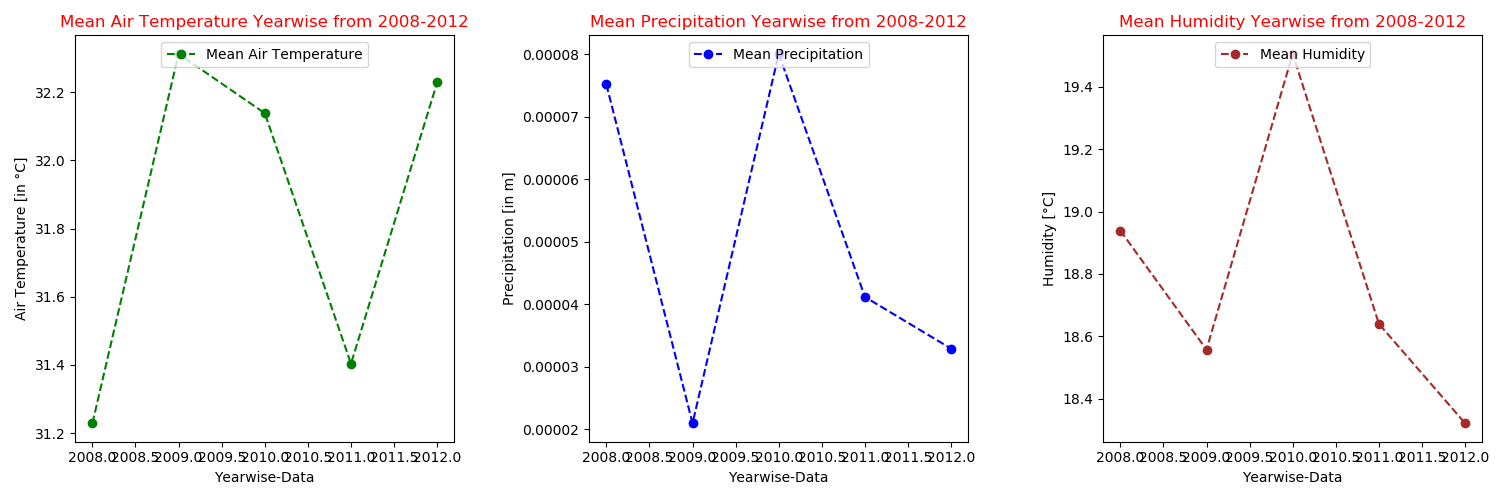

In [36]:
import warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].set_xlabel('Yearwise-Data')
axs[0].set_ylabel('Air Temperature [in °C]')
axs[0].set_title('Mean Air Temperature Yearwise from 2008-2012',color = 'Red')
axs[0].plot(time_range_yr,md_value_t2m_yr ,linestyle = '--', marker='o', color='g', label='Mean Air Temperature')
axs[0].legend(loc = 'upper center')

axs[1].set_xlabel('Yearwise-Data')
axs[1].set_ylabel('Precipitation [in m]')
axs[1].set_title('Mean Precipitation Yearwise from 2008-2012',color = 'Red')
axs[1].plot(time_range_yr,md_value_tp_yr ,linestyle = '--', marker='o', color='b', label='Mean Precipitation')
axs[1].legend(loc = 'upper center')

axs[2].set_xlabel('Yearwise-Data')
axs[2].set_ylabel('Humidity [°C]')
axs[2].set_title('Mean Humidity Yearwise from 2008-2012',color = 'Red')
axs[2].plot(time_range_yr,md_value_d2m_yr ,linestyle = '--', marker='o', color='brown', label='Mean Humidity')
axs[2].legend(loc = 'upper center')

plt.tight_layout()

plt.show()

#### Calculating the correlation coefficients between burnead area and other variables for hypothesis 1

In [37]:
sixmonth_yearwise_data_h1 = {'Date': time_range_6m_yr,
                            'Burned Area': ba_value_6m_yr,
                            'Temperature': md_value_t2m_6m_yr,
                            'Precipitation': md_value_tp_6m_yr,
                            'Humidity': md_value_d2m_6m_yr}

h1_analysis_6m_yr = pd.DataFrame(sixmonth_yearwise_data_h1)

h1_analysis_6m_yr


Date   Burned Area  Temperature  Precipitation   Humidity
0   2008-01   1277.594624    27.839104   1.658414e-05  15.440383
1   2008-02   1774.851456    28.478615   7.137285e-05  17.465099
2   2008-03   6063.141376    30.666988   1.315353e-04  18.386534
3   2008-04   1210.674944    33.327911   3.754133e-05  19.676519
4   2008-05   1275.501824    35.498169   2.200442e-05  20.313694
5   2008-06      6.225099    31.562040   1.720566e-04  22.352571
6   2009-01    714.759616    28.152271   2.899798e-06  15.524917
7   2009-02   6395.540480    30.586935   2.298161e-07  15.949995
8   2009-03  17527.738368    32.209351   1.481826e-05  16.978258
9   2009-04   1458.552064    34.536671   8.964977e-06  18.994337
10  2009-05    220.937424    34.858860   4.476801e-05  21.493143
11  2009-06     88.654032    33.533329   5.395324e-05  22.405712
12  2010-01    128.526864    27.298912   3.112686e-05  15.882653
13  2010-02   1176.973440    29.842697   3.300893e-06  16.449921
14  2010-03  12709.242880    33.053612   4.360811e-06  18.490358
15  2010-04   1188.189440    35.187702   7.348359e-06  20.680031
16  2010-05      3.005220    34.991302   1.986656e-04  22.131550
17  2010-06      0.000000    32.456127   2.357113e-04  23.395128
18  2011-01    133.946992    27.630617   6.719339e-06  14.744189
19  2011-02   1334.854784    29.054979   2.021088e-05  15.894354
20  2011-03   9142.688768    32.029037   5.985450e-06  16.637081
21  2011-04   1952.589056    32.659348   9.709442e-05  20.286585
22  2011-05      0.000000    34.935234   2.614796e-05  21.670252
23  2011-06      0.000000    32.112511   9.076642e-05  22.610193
24  2012-01    285.174016    27.544388   2.070245e-05  15.589699
25  2012-02  13731.768320    30.099846   5.767767e-07  14.874564
26  2012-03  16066.502656    32.951653   7.268029e-06  16.052479
27  2012-04    837.115072    34.055099   2.741650e-05  20.225451
28  2012-05      7.459387    35.617565   2.866237e-05  20.929987
29  2012-06     20.070584    33.108303   1.126512e-04  22.260225

#### The column date has been ignored while calculating correltion between variables.

In [38]:
corr_table_h1_6m_yr = h1_analysis_6m_yr.loc[:, ~h1_analysis_6m_yr.columns.isin(['Date'])].corr()
corr_table_h1_6m_yr

Burned Area  Temperature  Precipitation  Humidity
Burned Area       1.000000    -0.007884      -0.320451 -0.427323
Temperature      -0.007884     1.000000       0.170210  0.740388
Precipitation    -0.320451     0.170210       1.000000  0.645929
Humidity         -0.427323     0.740388       0.645929  1.000000

#### Interpretation of correlation cooefficients for six month year wise data: For entire Andhra Pradesh

The temperature is negatively correlated with 0.7% (even though it is close to zero). Precipitation and Humidity 
are negatively correlated with burned area with 32% and 42.7% respectively.
    
#### Interpretation of correlation cooefficients for six month year wise data: For Nalla Malla Forest Area

The temperature is negatively correlated with 1.75% (even though it is close to zero). Precipitation and Humidity 
are negatively correlated with burned area with 17.1% and 64% respectively.

In [39]:
yearwise_data_h1 = {'Date': time_range_yr,
                            'Burned Area': ba_value_yr,
                            'Temperature': md_value_t2m_yr,
                            'Precipitation': md_value_tp_yr,
                            'Humidity': md_value_d2m_yr}
h1_analysis_yr = pd.DataFrame(yearwise_data_h1)

h1_analysis_yr

Date   Burned Area  Temperature  Precipitation   Humidity
0  2008  11607.989248    31.228878       0.000075  18.939163
1  2009  26406.182912    32.312889       0.000021  18.557735
2  2010  15205.936128    32.138435       0.000080  19.504980
3  2011  12564.078592    31.403507       0.000041  18.640430
4  2012  30948.091904    32.229313       0.000033  18.322079

In [40]:
corr_table_h1_yr = h1_analysis_yr.loc[:, ~h1_analysis_yr.columns.isin(['Date'])].corr()
corr_table_h1_yr

Burned Area  Temperature  Precipitation  Humidity
Burned Area       1.000000     0.805756      -0.720599 -0.637048
Temperature       0.805756     1.000000      -0.431962 -0.113700
Precipitation    -0.720599    -0.431962       1.000000  0.865386
Humidity         -0.637048    -0.113700       0.865386  1.000000

#### Interpretation of correlation cooefficients for year wise data: For entire Andhra Pradesh 

The temperature is highly positively correlated with burned area with 80%.
Precipitation and Humidity are negatively correlated with burned area with 72% and 63.7% respectively.

#### Interpretation of correlation cooefficients for year wise data: For Nalla Malla Forest only 

The temperature is positively correlated with burned area with 58.4%.
Precipitation and Humidity are highly negatively correlated with burned area with 90.4% and 88.3% respectively.

## 6. Data Analysis: Hypothesis 2

I will divide the data analysis for the given hypothesis in two parts. Seeing the data trend over the given period of time 
for the complete state of Andhra Pradesh in both monthly and yearly wise. 

Later, I further shorten our study area to only forest region in Andhra Pradesh by changing the initial slice extent and calculate again the trends of all variables and see if there is any strong correlation between the only burned area and the respective variables considered for the hypothesis.

## 6.1 Hypothesis 2: Change in the Aerosol Optical Depth during and/or post forest fires due to very high carbon emissions.



In [41]:
time_range_6m_yr, ca_area_ap_bcaod_6m_yr= sixmonth_year(ca_area_ap_bcaod,2)

time_range_6m_yr, ca_area_ap_duaod_6m_yr= sixmonth_year(ca_area_ap_duaod,2)

time_range_6m_yr, ca_area_ap_aod_6m_yr= sixmonth_year(ca_area_ap_aod,2)



<IPython.core.display.Javascript object>


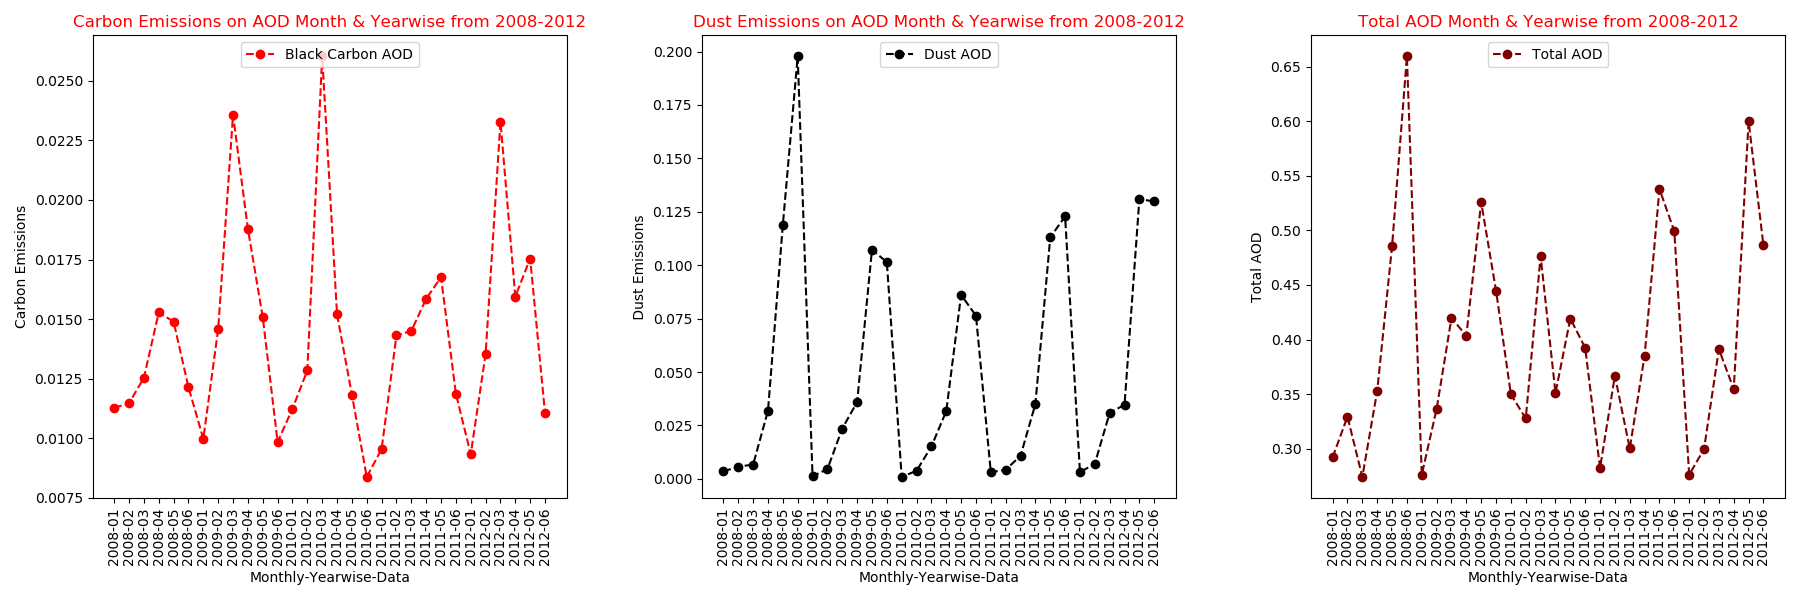

In [42]:
import warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(1, 3, figsize=(18,6))

axs[0].set_xticklabels(time_range_6m_yr, rotation=90)
axs[0].set_xlabel('Monthly-Yearwise-Data')
axs[0].set_ylabel('Carbon Emissions')
axs[0].set_title('Carbon Emissions on AOD Month & Yearwise from 2008-2012',color = 'Red')
axs[0].plot(time_range_6m_yr,ca_area_ap_bcaod_6m_yr ,linestyle = '--', marker='o', color='red', label='Black Carbon AOD')
axs[0].legend(loc = 'upper center')

axs[1].set_xticklabels(time_range_6m_yr, rotation=90)
axs[1].set_xlabel('Monthly-Yearwise-Data')
axs[1].set_ylabel(' Dust Emissions ')
axs[1].set_title('Dust Emissions on AOD Month & Yearwise from 2008-2012',color = 'Red')
axs[1].plot(time_range_6m_yr,ca_area_ap_duaod_6m_yr ,linestyle = '--', marker='o', color='black', label='Dust AOD')
axs[1].legend(loc = 'upper center')

axs[2].set_xticklabels(time_range_6m_yr, rotation=90)
axs[2].set_xlabel('Monthly-Yearwise-Data')
axs[2].set_ylabel('Total AOD')
axs[2].set_title('Total AOD Month & Yearwise from 2008-2012',color = 'Red')
axs[2].plot(time_range_6m_yr,ca_area_ap_aod_6m_yr ,linestyle = '--', marker='o', color='maroon', label='Total AOD')
axs[2].legend(loc = 'upper center')

plt.tight_layout()

plt.show()

In [43]:
time_range_yr, ca_area_ap_bcaod_yr= year_wise(ca_area_ap_bcaod,2)

time_range_yr, ca_area_ap_duaod_yr= year_wise(ca_area_ap_duaod,2)

time_range_yr, ca_area_ap_aod_yr= year_wise(ca_area_ap_aod,2)



<IPython.core.display.Javascript object>


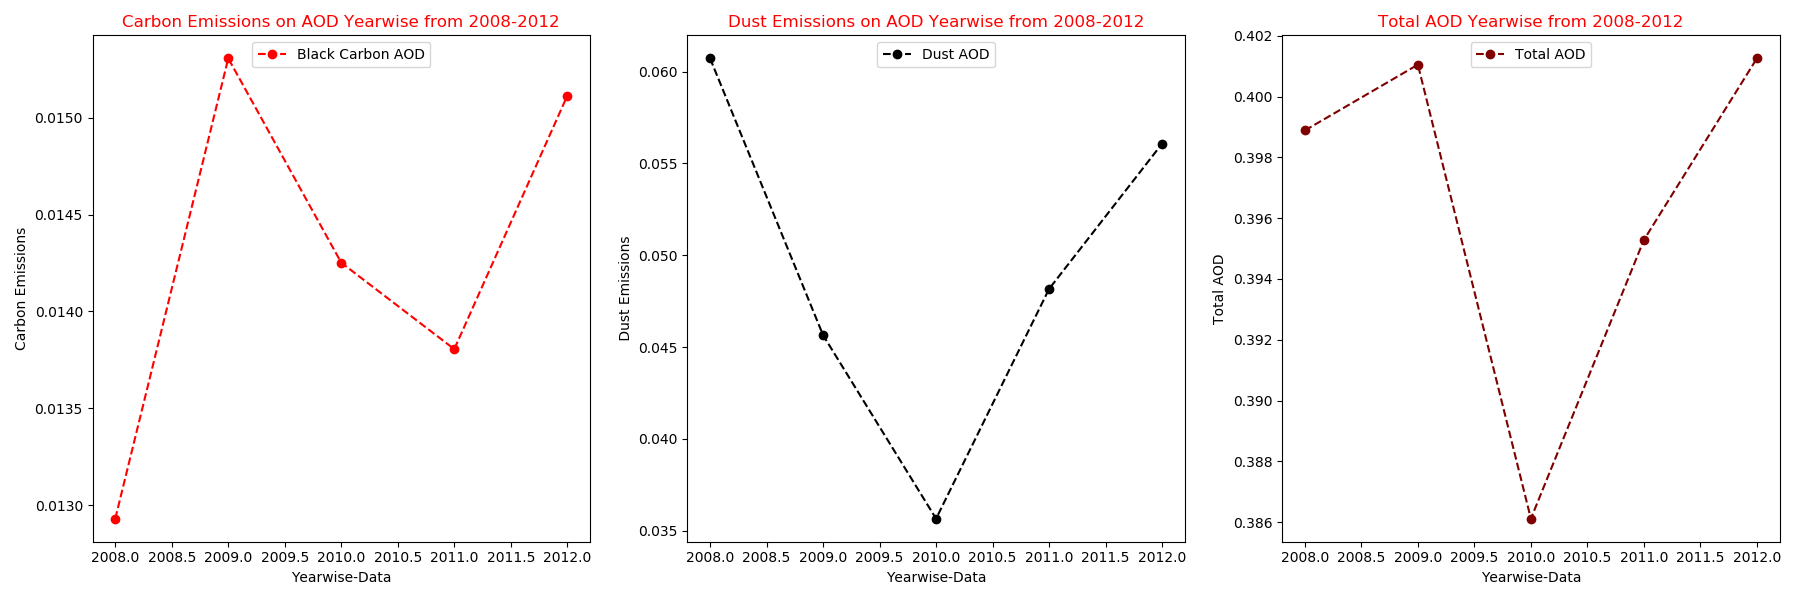

In [44]:
import warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(1, 3, figsize=(18,6))

axs[0].set_xlabel('Yearwise-Data')
axs[0].set_ylabel('Carbon Emissions')
axs[0].set_title('Carbon Emissions on AOD Yearwise from 2008-2012',color = 'Red')
axs[0].plot(time_range_yr,ca_area_ap_bcaod_yr ,linestyle = '--', marker='o', color='red', label='Black Carbon AOD')
axs[0].legend(loc = 'upper center')

axs[1].set_xlabel('Yearwise-Data')
axs[1].set_ylabel(' Dust Emissions ')
axs[1].set_title('Dust Emissions on AOD Yearwise from 2008-2012',color = 'Red')
axs[1].plot(time_range_yr,ca_area_ap_duaod_yr ,linestyle = '--', marker='o', color='black', label='Dust AOD')
axs[1].legend(loc = 'upper center')

axs[2].set_xlabel('Yearwise-Data')
axs[2].set_ylabel('Total AOD')
axs[2].set_title('Total AOD Yearwise from 2008-2012',color = 'Red')
axs[2].plot(time_range_yr,ca_area_ap_aod_yr ,linestyle = '--', marker='o', color='maroon', label='Total AOD')
axs[2].legend(loc = 'upper center')

plt.tight_layout()

plt.show()

In [45]:
sixmonth_yearwise_data_h2 = {'Date': time_range_6m_yr,
                             'Burned Area': ba_value_6m_yr,
                            'Black Carbon AOD': ca_area_ap_bcaod_6m_yr,
                            'Dust AD': ca_area_ap_duaod_6m_yr,
                            'Total AOD': ca_area_ap_aod_6m_yr}

h2_analysis_6m_yr = pd.DataFrame(sixmonth_yearwise_data_h2)

h2_analysis_6m_yr


Date   Burned Area  Black Carbon AOD   Dust AD  Total AOD
0   2008-01   1277.594624          0.011274  0.003468   0.292205
1   2008-02   1774.851456          0.011465  0.005722   0.329403
2   2008-03   6063.141376          0.012534  0.006656   0.274198
3   2008-04   1210.674944          0.015280  0.031859   0.352928
4   2008-05   1275.501824          0.014889  0.118890   0.485269
5   2008-06      6.225099          0.012137  0.197736   0.659330
6   2009-01    714.759616          0.009973  0.001217   0.276198
7   2009-02   6395.540480          0.014584  0.004512   0.336395
8   2009-03  17527.738368          0.023578  0.023550   0.419638
9   2009-04   1458.552064          0.018784  0.035925   0.403600
10  2009-05    220.937424          0.015079  0.107265   0.525751
11  2009-06     88.654032          0.009838  0.101434   0.444736
12  2010-01    128.526864          0.011235  0.000890   0.349757
13  2010-02   1176.973440          0.012843  0.003771   0.327743
14  2010-03  12709.242880          0.026029  0.015142   0.476434
15  2010-04   1188.189440          0.015200  0.031686   0.351102
16  2010-05      3.005220          0.011828  0.086103   0.419219
17  2010-06      0.000000          0.008372  0.076359   0.392415
18  2011-01    133.946992          0.009541  0.003078   0.282348
19  2011-02   1334.854784          0.014313  0.004277   0.366853
20  2011-03   9142.688768          0.014501  0.010747   0.300273
21  2011-04   1952.589056          0.015853  0.035023   0.385282
22  2011-05      0.000000          0.016757  0.113046   0.537807
23  2011-06      0.000000          0.011866  0.122847   0.499156
24  2012-01    285.174016          0.009325  0.003113   0.276177
25  2012-02  13731.768320          0.013532  0.007061   0.299684
26  2012-03  16066.502656          0.023289  0.030862   0.391258
27  2012-04    837.115072          0.015944  0.034669   0.354508
28  2012-05      7.459387          0.017538  0.130929   0.599747
29  2012-06     20.070584          0.011050  0.129831   0.486190

In [46]:
corr_table_h2_6m_yr = h2_analysis_6m_yr.loc[:, ~h2_analysis_6m_yr.columns.isin(['Date'])].corr()
corr_table_h2_6m_yr

Burned Area  Black Carbon AOD   Dust AD  Total AOD
Burned Area          1.000000          0.679114 -0.361710  -0.166386
Black Carbon AOD     0.679114          1.000000 -0.068728   0.276215
Dust AD             -0.361710         -0.068728  1.000000   0.901497
Total AOD           -0.166386          0.276215  0.901497   1.000000

#### Interpretation of correlation cooefficients for six month year wise data: For Andhra Pradesh area

The carbon emissions is positively correlated with burned area with 67.9%. 
Dust AOD and Total AOD are negatively correlated with burned area with 36.1% and 16.6% respectively.

#### Interpretation of correlation cooefficients for six month year wise data: For Nalla Malla Forest area only

The carbon emissions is positively correlated with burned area with 36%. 
Dust AOD and Total AOD are negatively correlated with burned area with 36% and 27.3% respectively.
    

In [47]:
yearwise_data_h2 = {'Date': time_range_yr,
                    'Burned Area': ba_value_yr,
                    'Black Carbon AOD': ca_area_ap_bcaod_yr,
                    'Dust AOD': ca_area_ap_duaod_yr,
                    'Total AOD': ca_area_ap_aod_yr}
h2_analysis_yr = pd.DataFrame(yearwise_data_h2)

h2_analysis_yr

Date   Burned Area  Black Carbon AOD  Dust AOD  Total AOD
0  2008  11607.989248          0.012930  0.060722   0.398889
1  2009  26406.182912          0.015306  0.045651   0.401053
2  2010  15205.936128          0.014251  0.035658   0.386112
3  2011  12564.078592          0.013805  0.048170   0.395286
4  2012  30948.091904          0.015113  0.056077   0.401261

In [48]:
corr_table_h2_yr = h2_analysis_yr.loc[:, ~h2_analysis_yr.columns.isin(['Date'])].corr()
corr_table_h2_yr

Burned Area  Black Carbon AOD  Dust AOD  Total AOD
Burned Area          1.000000          0.898556  0.084085   0.544203
Black Carbon AOD     0.898556          1.000000 -0.332712   0.256358
Dust AOD             0.084085         -0.332712  1.000000   0.760963
Total AOD            0.544203          0.256358  0.760963   1.000000

#### Interpretation of correlation cooefficients for year wise data: For Andhra Pradesh area

The Carbon emissions is highly positively correlated with burned area with 89.8% with year wise aggregration of data . 
Dust AOD and Total AOD are also positivley correlated with burned area with 8% and 54.4% respectively.

#### Interpretation of correlation cooefficients for year wise data: For Nalla Malla Forest area only

The Carbon emissions is positively correlated with burned area with 28.6% with year wise aggregration of data . 
Dust AOD and Total AOD are correlated with burned area with  positively 7% and negatiely 77.6% respectively.
    

## 7. Conclusion:

### 7.1 Conclusion for Hypothesis 1:

As I don't exactly know the dates of wildfires in the given months, the yearly aggregated data showed a better correlation of burned area data with the Air Temperature, Precipitaion and humidity than the monthly year wise based data.

The precipitaion and humidity are highly corrleated (negatively) when I considered the forest area only subset data whereas Air Temperature is highly correlated (positively) with the complete Andhra Pradesh state subset.

### 7.1 Conclusion for Hypothesis 2:

The yearly aggregated data showed a better correlation of burned area data with the Carbon Emissions (bcaod) with a very high value of 89.8% of correlation.

When considered the forest only area subset of the dataset, the Total Aerosol Optical Depth (aod) is negatively (correlated) with burned area.

## Final thoughts:

##### Both hypothesis looks true when the data is aggregated yearly. The hypothesis 2 seems to be very promising because very high correlation of Carbon emissions with burned area. If analysis is applied with all historical data and an ML Model is developed, there is a scope that predicting the amount of Carbon Emissions into the atmosphere  during forest fires gives promising results which helps in saving environment and human health.



## Author: Jayendra Praveen Kumar Chorapalli, 
#### M.Sc ESPACE, TU Munich

Contact : jayendra.chorapali@tum.de 